<a href="https://colab.research.google.com/github/YirenShen-07/Yiren-590Assignemnt3/blob/main/%E2%80%9CAssignment3_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Include the button below. Change the link to the location in your github repository:
# AIPI 590 - XAI | Assignment #3
### Yiren Shen
### Use linear regression, logistic regression, and Generalized Additive Model to analyze the factors that lead to churn and develop interpretable models to predict which customers are at risk of churn.


In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data="/content/drive/MyDrive/assignment3.csv"
df=pd.read_csv(data)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis

Perform a basic exposition of the dataset：




In [5]:
# show the number of feature columns in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Find out how many customers are choosing to stay with the company and how many are churning by looking at the ratio of churned (lost) to unchurned customers. Help visualize the extent of the customer retention issues the company is currently facing：


In [6]:
# Demonstrate the number of churned vs. non-churned customers
fig = px.pie(df, names='Churn', title='Percentage of Churn',
             color='Churn',
             color_discrete_map={'Yes': 'darkblue', 'No': 'lightblue'})
fig.show()



*   26.5% of customers were churned (“Yes”) and 73.5% of customers were not churned (“No”)
*  Suggests that about a quarter of the customers in this
dataset have churned, while about three-thirds remain with the company
*  Companies may need to pay special attention to this group of churned customers in order to improve their customer retention strategies

Analyze the relationship between the three characteristics SeniorCitizen, tenure, and MonthlyCharges based on the correlation matrix：

In [7]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000




*   SeniorCitizen has a weak relationship with other variables: the relationship between being a senior customer and tenure or MonthlyCharges is weak. Older customers do not seem to have a significant tendency to serve longer or pay higher monthly charges
*   There is some positive correlation between tenure and MonthlyCharges: although the correlation is not strong, it can be seen that customers with longer service may be more inclined to pay higher monthly charges

*   The correlation between all the features is not high, the highest correlation coefficient is 0.2479, which means that the linear relationship between these features is weak.






Initial understanding of the composition of the customer base through three distribution charts, e.g., the distribution of elderly and non-elderly customers, the length of time customers have been using the company's services, and how much they pay per month：

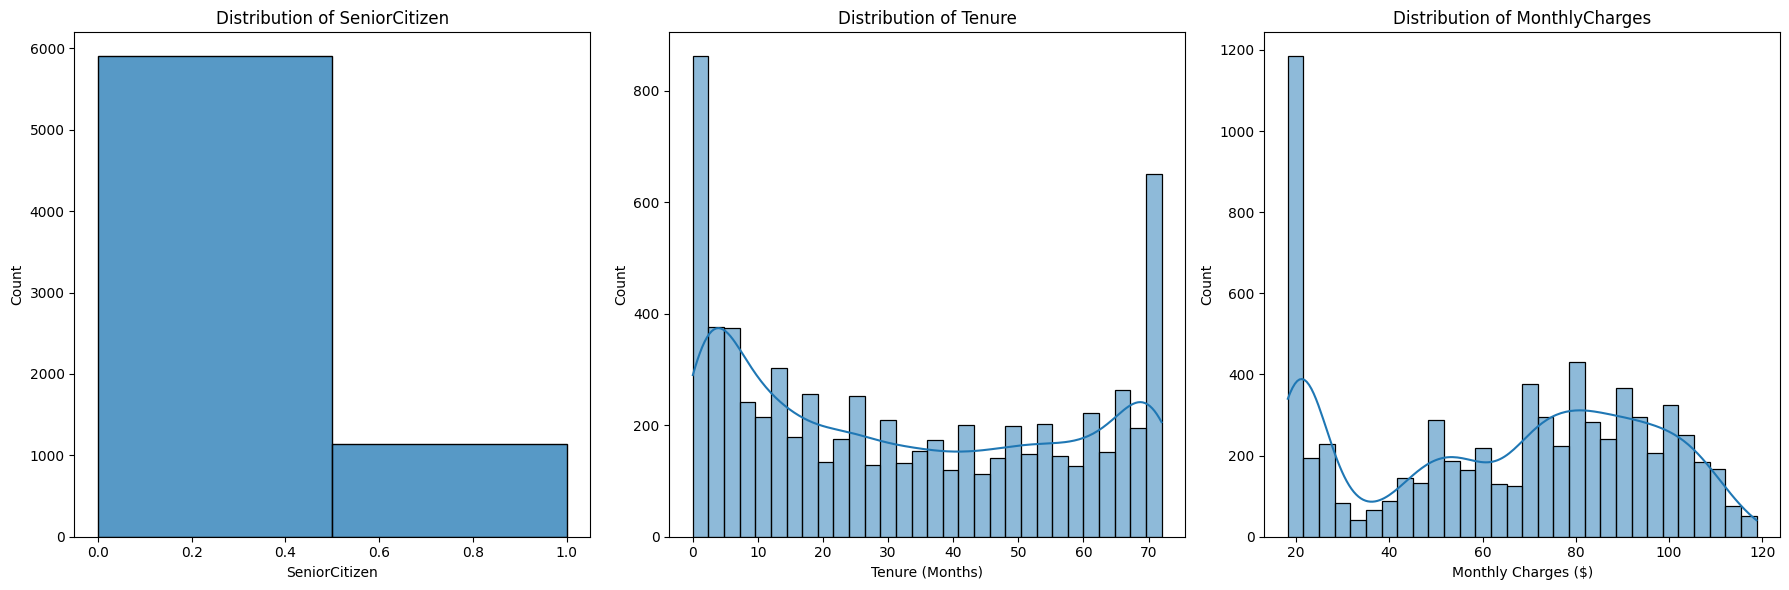

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribution of SeniorCitizen
sns.histplot(df['SeniorCitizen'], kde=False, bins=2, ax=axes[0])
axes[0].set_title('Distribution of SeniorCitizen')
axes[0].set_xlabel('SeniorCitizen')
axes[0].set_ylabel('Count')

# Distribution of tenure
sns.histplot(df['tenure'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Tenure')
axes[1].set_xlabel('Tenure (Months)')
axes[1].set_ylabel('Count')

# Distribution of MonthlyCharges
sns.histplot(df['MonthlyCharges'], kde=True, bins=30, ax=axes[2])
axes[2].set_title('Distribution of MonthlyCharges')
axes[2].set_xlabel('Monthly Charges ($)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()




*  **Distribution of SeniorCitizen:** The vast majority of customers have a SeniorCitizen value of 0, meaning that the company has a relatively small number of elderly customers in its customer base
*   **Distribution of tenure:** The distribution of time in service is relatively spread out, but there are two distinct peaks - the
One is a high number of customers with service times within 0-10 months, indicating that many customers signed up for service within a short period of time. The other peak is around 70 months, indicating a group of customers who have been with the company for a long time and have been in service for a significant period of time
*   **Distribution of MonthlyCharges:** Monthly costs are relatively evenly distributed, but are concentrated between 20 and 100, with notable peaks in the 20 in particular








# Linear Regression

 Build a linear regression model to predict churn：

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
# To allow the model to handle target variables，Convert the Churn column to a binary value
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2 = pd.get_dummies(df)

In [11]:
# Training logistic regression models
X=df2.drop(columns=['Churn'])
Y=df2['Churn']
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Model Prediction and Evaluation
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.2861756739280048




*   R-squared = 0.2861 indicates that this linear regression model explains only 28.61% of the variability in customer churn
*   This relatively low R² value indicates that the model is not a good fit. Linear regression may not be able to capture the complexity of the relationship behind customer churn as well, and a more complex model may need to be used to improve explanatory power



In [17]:
print("Intercept:", model.intercept_)

Intercept: 0.569282814959128




*  The intercept indicates that the predicted probability of customer churn is 0.569 when the coefficients of all features are zero. If there is no effect of any feature on churn, the model defaults to predicting a probability of churn of 56.9%




In [14]:
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.13894340734402286




*   The MSE indicates that the mean error between predicted and actual values is approximately 0.1389
*   This MSE value is relatively high, further indicating that the model predicts a large error, especially when predicting customer churn






In [18]:
# Get feature names and corresponding coefficients
coefficients = model.coef_
feature_names = X.columns

In [19]:
# Create a DataFrame showing feature names and corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Output the coefficients table
print(coef_df)

                     Feature  Coefficient
0              SeniorCitizen     0.041045
1                     tenure    -0.004296
2             MonthlyCharges    -0.004575
3      customerID_0002-ORFBO    -0.083535
4      customerID_0003-MKNFE    -0.203356
...                      ...          ...
13613    TotalCharges_997.75     0.000000
13614     TotalCharges_998.1     0.057844
13615    TotalCharges_999.45     0.234478
13616     TotalCharges_999.8    -0.245176
13617     TotalCharges_999.9    -0.248117

[13618 rows x 2 columns]




*   Shows some of the features and their corresponding coefficients
*   SeniorCitizen has a coefficient of 0.041045. This positive coefficient indicats that the probability of churn is slightly higher for senior customers compared to non-senior customers, but the coefficient is small, suggesting that this characteristic does not have a strong effect on churn

*   Tenure is the length of time a customer has been with the firm, with a coefficient of -0.004296. This negative coefficient indicates that the longer the service time, the less likely the customer is to churn
*   The coefficient of MonthlyCharges is -0.004575, which is also negative. It means that the probability of churning decreases slightly the higher the monthly charge paid by the customer





**Linear Regression Model Conclusion：**

The linear regression model is designed to predict customer churn and explains the effect of each characteristic through R-squared value (0.2861) and coefficients. The results show that the model explains only about 28.6% of customer churn and that key characteristics such as SeniorCitizen and tenure have a small effect on churn, indicating that linear regression is a poor fit for this problem.

# Logistic Regression

 Build a logistic regression model to predict churn：

In [34]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score

In [35]:
# Remove the customerID column as it has no real meaning for model prediction
df_clean = df.drop(columns=['customerID'])
# Convert the TotalCharges column to a numeric value
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)
df_clean = pd.get_dummies(df_clean, drop_first=True)

In [36]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
X=df_clean.drop(columns=['Churn'])
y=df_clean['Churn']

In [37]:
# Training logistic regression models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Model Prediction and Evaluation
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
coefficients_logistic = logistic_model.coef_

In [42]:
# print output
print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print(f"Logistic Regression Coefficients: {coefficients_logistic}")

Logistic Regression Accuracy: 0.8183108587650816
Logistic Regression Coefficients: [[ 2.29954645e-01 -6.03366580e-02  4.64165279e-03  2.91502807e-04
  -4.30976458e-02  1.06728622e-01 -1.60194357e-01 -4.52730737e-01
   2.69285439e-01  2.14372218e-01  5.59830896e-01 -1.17142575e-01
  -1.17142575e-01 -5.98466561e-01 -1.17142575e-01 -2.53857782e-01
  -1.17142575e-01 -9.00763366e-02 -1.17142575e-01 -5.46033875e-01
  -1.17142575e-01  1.45808453e-01 -1.17142575e-01  2.54586947e-01
  -3.92058141e-01 -7.05068334e-01  4.19665923e-01 -1.34013620e-01
   2.36397177e-01 -7.24918574e-02]]




*  The model's accuracy on the test data was 81.8%, meaning that approximately 82% of the customer churn predictions were correct
*   2.29954645e-01: This coefficient is close to 0.23 and represents the effect of the first characteristic. This positive coefficient indicates that as customer tenure increases, the likelihood of customer churn increases
*   -6.03366580e-02: This negative coefficient indicates that MonthlyCharges have a slight negative effect on customer churn. That is, the likelihood of customer churn decreases slightly as monthly charges increase








**Logistic Regression Conclusion：**

This model provides some interpretability through the coefficients. The accuracy of the model indicates that it is able to correctly predict whether or not a customer will churn in about 81.8% of the cases, showing that the model is effective in identifying churned customers. From an interpretive perspective, the coefficients provide insights into the impact of individual features on customer churn. For example, the coefficient for tenure is positive (0.229), which implies that customers with longer service times are more likely to churn. On the other hand, the coefficient on MonthlyCharges is negative (-0.060), indicating that customers with higher monthly fees are slightly less likely to churn, although the effect is small.

# Generalized Additive Model (GAM)

Build a GAM model to predict churn：

In [43]:
!pip install pygam --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 22.2 MB/s eta 0:00:00


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, s, LogisticGAM

In [49]:
# Normalize the features of the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Initialize the GAM model with spline terms for each feature
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4))
gam.fit(X_train_scaled, y_train)
y_pred_gam = gam.predict(X_test_scaled)

# Evaluate the model
mse_gam = mean_squared_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)
print(f"GAM MSE: {mse_gam:.4f}")
print("GAM Accuracy:", accuracy_score(y_test, y_pred_gam))

GAM MSE: 0.1930
GAM Accuracy: 0.8069552874378992




*   The value of MSE is 0.1930, which indicates that the difference between the predicted and actual values exists to some extent, but is not very large
*   The gam model accuracy is 0.8069, which means that about 80.7% of the test data was correctly categorized, which is a high rate of correctness for the overall prediction



In [51]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      39.172
Link Function:                        LogitLink Log Likelihood:                                 -2444.6443
Number of Samples:                         5634 AIC:                                             4967.6326
                                                AICc:                                             4968.224
                                                UBRE:                                               2.8873
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2503
Feature Function                  Lam

<ipython-input-51-dec6a6acdaaa>:1: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 






*   According to the output of gam.summary(), features s(0) to s(3) have a significant effect on the model, especially s(1) and s(2), while the contribution of s(4) is not significant




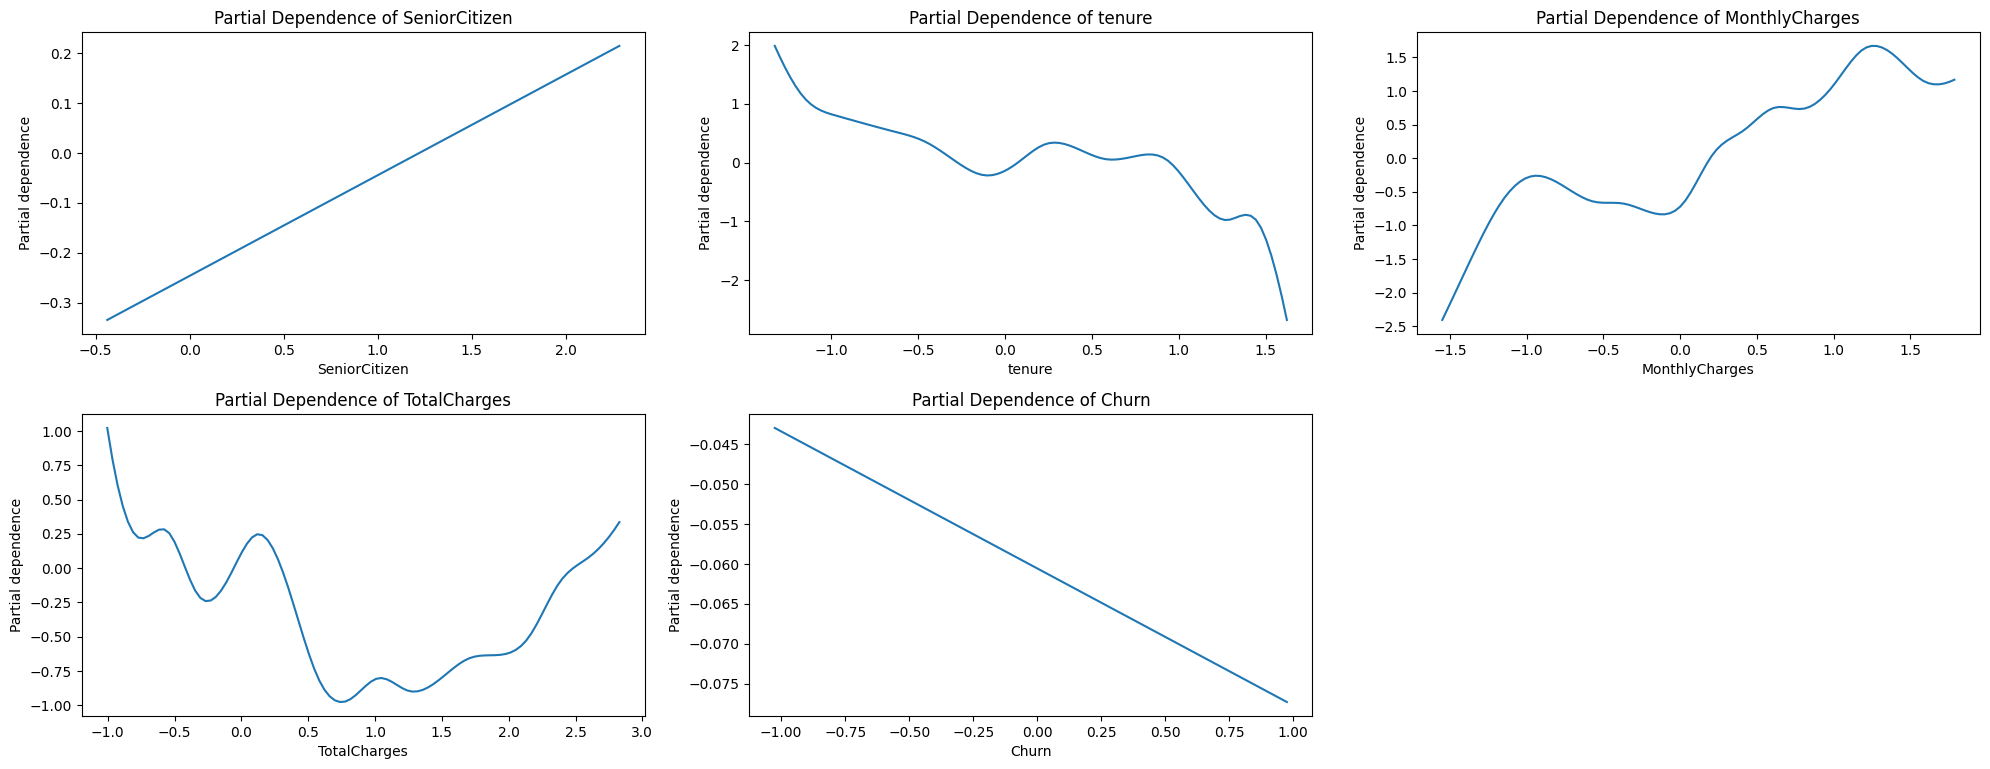

In [53]:
plt.figure(figsize=(20, 15))
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']  # List of features to visualize

# Iterate over each term (feature)
for i, term in enumerate(features):
    plt.subplot(4, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    # Plot partial dependence
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial Dependence of {term}')
    plt.ylabel('Partial dependence')
    plt.xlabel(term)

plt.tight_layout()
plt.show()



*   **Partial Dependence of SeniorCitizen:** The graph shows a linear trend, indicating that as the SeniorCitizen value increases, the model predictions also increase linearly. This reflects the positive correlation between older users and churn predicted by the model
*   **Partial Dependence of Tenure:** The partial dependency curve shows a gradual downward trend, indicating that the model predictions gradually decrease as the length of the user's contract increases, possibly implying that longer-term customers are less likely to churn
*   **Partial Dependence of MonthlyCharges:** The chart for MonthlyCharges shows some volatility, with curves showing lower predicted values at lower monthly charges and rising predicted values as monthly charges increase, suggesting that customers with higher monthly charges have a higher churn risk
*   **Partial Dependence of TotalCharges:** The curve decreases in the initial part and then tends to increase as TotalCharges increases. This means that customers with lower TotalCharges have a lower risk of churn, while higher TotalCharges may correspond to higher churn rates
*   **Partial Dependence of Churn:** A negative slope indicates that the probability of churn decreases as the value of the Churn feature increases








**GAM Model Conclusion:**

The accuracy of this model is demonstrated by its ability to capture key features such as SeniorCitizen, MonthlyCharges, and TotalCharges variables that all have a significant impact on the model's predictions. The model is able to identify the non-linear relationship between these features and customer churn and provides some interpretability through partial dependency plots demonstrating the independent influence of the features with respect to the target variables.

However, the overall explanatory power of the model is limited in terms of the model's pseudo-Rsquare value and AIC metrics, with about 25% of the variance explained, suggesting room for improvement. Nonetheless, the partial dependency plots suggest that the model has some ability to parse out potential influences on customer churn.

# Compare Between Model

In [54]:
summary = {}
summary['Linear Regression'] = {'MSE': mse, 'R-squared': r2}
summary['Logistic Regression'] = {'Accuracy': accuracy_logistic}
summary['Generalized Additive Model (GAM)'] = {'MSE': mse_gam, "GAM Accuracy":accuracy_score(y_test, y_pred_gam)}
print("Model Comparison Summary:")
for model, metrics in summary.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Comparison Summary:

Linear Regression:
  MSE: 0.1389
  R-squared: 0.2862

Logistic Regression:
  Accuracy: 0.8183

Generalized Additive Model (GAM):
  MSE: 0.1930
  GAM Accuracy: 0.8070


**Strengths and Weaknesses:**



*   Linear Regression:

  Pros: Direct explanations of features can be provided to help understand which factors are highly correlated with customer churn.

  Cons: The R² value of 0.2862 indicates that the linear regression only explains 28.62% of the variance, which is a poor fit.
Linear regression assumes a linear relationship between the characteristics and the target, which may not capture the complex non-linear relationships in real world situations.
*   Logistic Regression:

  Pros: The logistic regression model performs well on the classification task with an accuracy of 81.83% and is able to differentiate between customer churn and retention well. Easy to interpret, the regression coefficients for each feature represent the direction of the feature's effect (positive or negative) on customer churn.

  Cons: may not handle complex nonlinear relationships well.

*   Generalized Additive Model, GAM:

  Pros: Allows each feature to affect the target variable in a flexible, nonlinear manner, capable of capturing complex inter-feature relationships.Although GAM's accuracy of 80.70% is slightly lower than logistic regression, it better captures nonlinear relationships and thus provides more nuanced predictions.

  Cons:The MSE of the GAM model is 0.1930, which is higher than the MSE of linear regression, suggesting that it performs weakly in terms of error minimization. GAM has a more complex model due to the introduction of nonlinear features, a slight decrease in interpretability compared to logistic regression.

**Recommendations:**

1. Logistic regression is a more ideal choice for the company because firstly it has high accuracy (81.83%) and can effectively predict whether a customer will churn or not. Secondly, the model is simple and easy to interpret, making it easy for the company to understand the impact of each characteristic on customer churn and thus make targeted business decisions.
2. If a company is more concerned with understanding the complex relationship between features and churn and can accept higher computational costs, it may choose a GAM model for its ability to reveal underlying nonlinear patterns. If the company is primarily concerned with easy interpretation and efficient business implementation, logistic regression is a better choice.


# Reference

1. AIPI-590-XAI. “https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/generalized-models-interpretability.ipynb”
Accessed 19 Sept. 2024.
2. AIPI-590-XAI. “https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/regression-interpretability.ipynb” Accessed 19 Sept. 2024.
3. Chatgpt. Explanation of Python code for models